In [1]:
import numpy as np
import pandas as pd
import my_sham_hack3 as sham
import random

from itertools import cycle, islice

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.lines import Line2D
%matplotlib inline

rcParams['font.family']='serif'
rcParams['mathtext.fontset'] = 'dejavuserif'
rcParams['font.family'] = 'serif' 
rcParams['xtick.labelsize'] = 16
#rcParams['xtick.major.size'] = 5 
#rcParams['xtick.major.width'] = 1.5 
rcParams['ytick.labelsize'] = 19
#rcParams['ytick.major.size'] = 5 
#rcParams['ytick.major.width'] = 1.5 
rcParams['legend.frameon'] = True
rcParams['axes.grid']=True
rcParams['axes.titlesize']=26
rcParams['axes.labelsize']=23
rcParams['legend.facecolor']='white'
rcParams['legend.fontsize']=20

In [11]:
def get_rng(nam,z):
    if (nam=='muzzin-bestslope')|(nam=='muzzin-sameslope'):
        nam='muzzin'
    mnam=nam+'_m'
    nnam=nam+'_dndlogm'
    rngs=pd.read_csv('~/projects/mergers/data/smf_ranges.csv')
    zs_lo=rngs['z_low']
    zs_hi=rngs['z_hi']
    if z in list(zs_lo)+list(zs_hi):
        inz=(z==zs_lo)|(z==zs_hi)|((zs_lo<z) & (zs_hi>z))
    else:
        inz=(zs_lo<z) & (zs_hi>z)
    
    try:
        if nam in ['fontana','duncan','baldry']:
            rng_ms=[]
            rng_dndlogms=[]
            for mod in ['_comp_','_inc_']:
                mnam=nam+mod+'m'
                nnam=nam+mod+'dndlogm'
                rng_ms.append(list(rngs[mnam][inz]))
                rng_dndlogms.append(list(rngs[nnam][inz]))
            rng_ms=np.array(rng_ms)
            rng_dndlogms=10.**np.array(rng_dndlogms)
            if rng_ms.shape[-1]==0:
                rng_ms=np.array([[0.1,17.],
                                 [0.1,17.]])
                rng_dndlogms=np.ones((2,2))*np.nan
        else:
            rng_ms=np.array(rngs[mnam][inz])
            rng_dndlogms=np.array(rngs[nnam][inz])
            isnan=np.isnan(rng_ms)
            rng_ms=rng_ms[~isnan]
            rng_dndlogms=10.**rng_dndlogms[~isnan]
    except KeyError:
        rng_ms=np.array([0.1,17.])
        rng_dndlogms=None
    if len(rng_ms)==0:
        rng_ms=np.array([0.1,17.])
        rng_dndlogms=None
    return np.array([rng_ms,rng_dndlogms])

def plt_smf(ax,smf,ms,z,compl_dashes=[1,0],**kwargs):
    source=smf.source
    mn_rngs=get_rng(source,z)
    if source in ['fontana','duncan','baldry']:
        Nrngs=mn_rngs.shape[1]
        ms_fit=np.array([mn_rngs[0][irng] for irng in np.arange(Nrngs)])
        m_min=np.nanmin(ms_fit,1)
        is_compl=ms>=m_min[0]
        is_inc=(ms<m_min[0])&(ms>=m_min[1])
        is_extrap=ms<m_min[1]
    else:
        ms_fit=mn_rngs[0]
        m_min=ms_fit.min()
        is_extrap=ms<m_min
        is_compl=~is_extrap
        is_inc=np.repeat(False,len(ms))
    ms_compl=ms[is_compl]
    ms_inc=ms[is_inc]
    ms_extrap=ms[is_extrap]
    
    ax.plot(ms_extrap,smf.dndm(ms_extrap),dashes=[1,4],**kwargs)
    ax.plot(ms_inc,smf.dndm(ms_inc),dashes=[4,3],**kwargs)
    ax.plot(ms_compl,smf.dndm(ms_compl),dashes=compl_dashes,**kwargs)
    return None

def plt_allsmfs(ax,z):
    ms=np.linspace(6,15,500)    
    sources=['cole','li','baldry','drory','mous',
             'perez','muzzin-bestslope',
             'march','fontana','santini','caputi','duncan',
             'lee']
    labels=['Cole et al. (2001)','Li & White (2009)',
            'Baldry et al. (2008)','Drory et al. (2009)',
            'Moustakas et al. (2013)',
            'P$\mathrm{\\acute{e}}$rez-Gonz$\mathrm{\\acute{a}}$lez et al. (2008)',
            'Muzzin et al. (2013)',
            'Marchesini et al. (2009)','Fontana et al. (2006)',
            'Santini et al. (2012)','Caputi et al. (2011)',
            'Duncan et al. (2014)','Lee et al. (2012)']
    
    #Getting the default colors:
    prop_cycle = plt.rcParams['axes.prop_cycle']
    cols = np.array(prop_cycle.by_key()['color'])
    
    #Switching out some of the default colors that don't work well:
    cols[0]='b'
    cols[4]='#7f0eff'
    cols[5]='k'
    #Adding more colors:
    cols=np.append(cols,['#00ff00','#ff00a5'])
    
    #Cycling through the indices of the colors array so I can give
    #each SMF a color
    col_is=np.array(list(islice(cycle(np.arange(len(cols))),
                                None,
                                len(sources))))
    #Indices for the color indices array. I'm generating this to
    #serve the joint purpose of randomizing the color assignment
    #(until I find a combination that looks best) and being able
    #to tell when I've gone through the default color list once,
    #at which point I probably should change the line style.
    
    ##Using the same random seed as when I originally generated the SMF panel plot
    ##doesn't seem to put the colors in the same order, so I'm commenting
    ##the following and just manually entering the col_iis that I
    ##generated for that panel plot.
    #col_iis=np.arange(len(col_is))
    #Using a seed so I get the same color assignments for each z
    #random.seed(2)
    #random.shuffle(col_iis)
    
    ##Entering the col_iis manually:
    col_iis=np.array([6,9,8,2,3,1,4,5,7,10,0,11,12])
    
    #print('col_iis:')
    #print(col_iis)
    #Change the line style once the code has gone through the
    #default color list once
    isdashed=col_iis>len(cols)-1
    
    for i,(source,col_ii) in enumerate(zip(sources,col_iis)):
        try:
            smf=sham.SMFClass(source,z)
        #except Z_RangeError:
        except ValueError:
            continue 
        #Change the line style if I've gone through the default
        #colors once:
        if isdashed[i]:
            dashes=[7,1]
        else:
            dashes=[1,0]
        plt_smf(ax,smf,ms,z,compl_dashes=dashes,color=cols[col_is[col_ii]])
    return labels,cols[col_is[col_iis]],isdashed

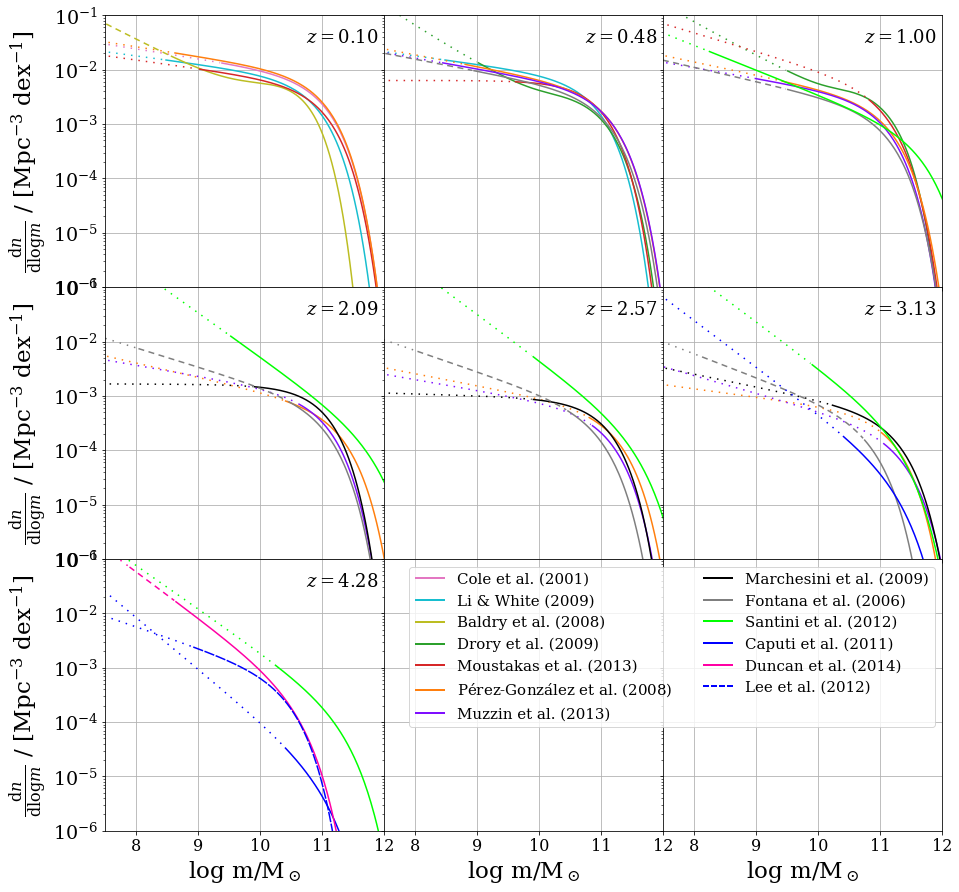

In [12]:
fig,axs=plt.subplots(3,3,figsize=(15,15),sharex=True,sharey=True)
axs=axs.ravel()
fig.subplots_adjust(wspace=0.,hspace=0.)

for axi,z in enumerate([0.1,0.48,1.,2.09,2.57,3.13,4.28]):
    labs,lab_cols,isdashed=plt_allsmfs(axs[axi],z)
    axs[axi].text(0.85,0.9,'$z=${0:0.2f}'.format(z),
            transform=axs[axi].transAxes,
            fontsize=18,ha='center')
    #axs[axi].legend(ncol=2,fontsize=16)

axs[axi].set_xlim(7.5,12)
axs[0].set_ylim(1e-6,1e-1)
axs[0].set_yscale('log')

for axi in [0,3,6]:
    axs[axi].set_ylabel('$\\frac{\mathrm{d}n}{\mathrm{d}\log m}$ / '
                  '[Mpc$^{-3}$ dex$^{-1}$]')
for axi in [6,7,8]:
    axs[axi].set_xlabel('log m/M$_\odot$')

dashess=np.repeat([[1,0]],len(labs),axis=0)
dashess[np.where(isdashed)[0]]=[3,1]
cust_lines=[Line2D([0],[0],dashes=list(d),color=col,lw=2) for col,d in zip(lab_cols,dashess)]
axs[8].legend(cust_lines,labs,ncol=2,fontsize=15)
    
plt.show()